# **Wine Quality Prediction using Machine Learning Algorithms**

***numpy pandas and mathplot librites to manipulate data***

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***reading csv dataset using pandas and printing all the columns of the wine dataset***

In [36]:
data=pd.read_csv("/content/sample_data/wine.csv")
print("Colums of dataset:\n", data.keys())

Colums of dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


***making a list of columns using pandas dataframe***

In [38]:
wine_data = pd.DataFrame(data, columns=['fixed acidity','volatile acidity','citric acid','residual sugar',
                                        'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])
wine_data.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,NaN,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


***rows and columns number***

In [39]:
wine_data.shape

(1599, 12)

***null values in differnt columns***

In [40]:
data.isnull().sum()

fixed acidity           1
volatile acidity        0
citric acid             4
residual sugar          0
chlorides               0
free sulfur dioxide     6
total sulfur dioxide    1
density                 1
pH                      0
sulphates               2
alcohol                 2
quality                 1
dtype: int64

***drop rows which contains any null value.***

In [41]:
wine_data = wine_data.dropna(axis = 0, subset = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                                        'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,bad


***After droping rows containing null values total number of rows and columns number***

In [42]:
wine_data.shape

(1581, 12)

***Droping Duplicate rows eg. row no. 0 & 4***

In [43]:
wine_data.drop_duplicates(subset = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                                    'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],
                           keep = "first", inplace = True)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,bad
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,bad


***After droping duplicate rows total number of rows and columns number***

In [44]:
wine_data.shape

(1345, 12)

***all unique categorical values in the class which is quality column***

In [45]:
wine_data["quality"].unique()

array(['bad', 'good'], dtype=object)

***adding one extra columns based on categorical values***

In [50]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
wine_data['quality_num'] = enc.fit_transform(wine_data['quality'])
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_num
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad,0
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,bad,0
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,bad,0


***total number of rows and columns***

In [51]:
wine_data.shape

(1345, 13)

***spillting dataset into training and test data***

In [52]:
from sklearn.model_selection import train_test_split
x=wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar',
             'chlorides','free sulfur dioxide','total sulfur dioxide','density',
             'pH','sulphates','alcohol']]
y=wine_data["quality_num"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=0)
data_x = pd.DataFrame(x_train, columns=['fixed acidity','volatile acidity','citric acid','residual sugar',
                                        'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

In [53]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1076, 11)
y_train shape: (1076,)
X_test shape: (269, 11)
y_test shape: (269,)


***visual representation of x_train data***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb9debe390>,
      dtype=object)

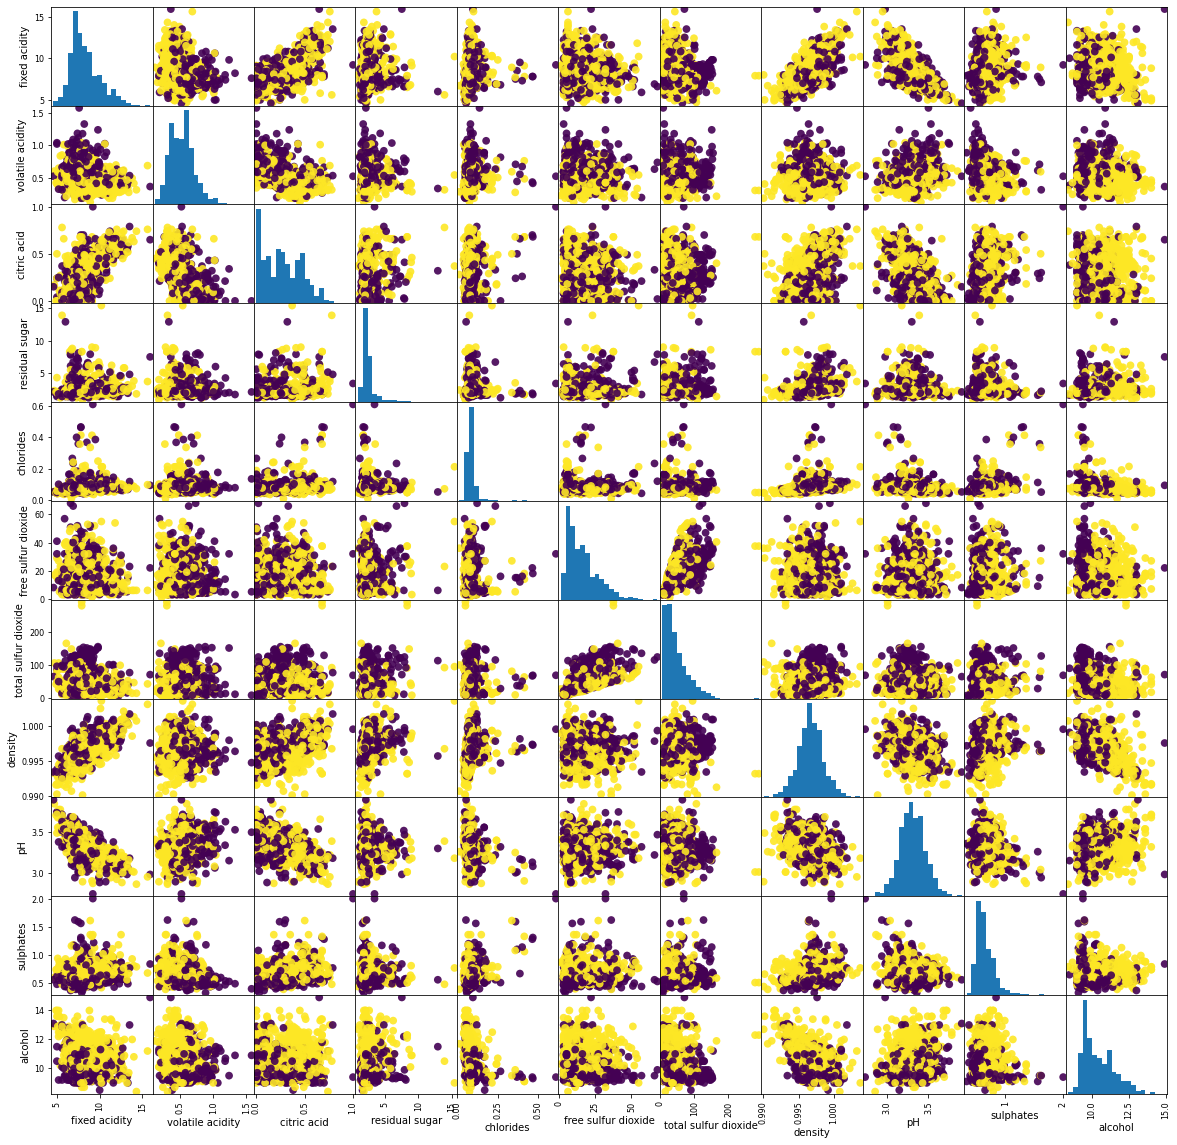

In [34]:
pd.plotting.scatter_matrix(data_x, c=y_train, figsize=(20, 20),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.9)

***Frequency of class (good or bad)***

Text(0, 0.5, 'no of samples')

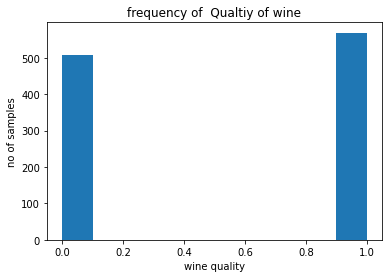

In [54]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  Qualtiy of wine')
ax.set_xlabel('wine quality')
ax.set_ylabel('no of samples')

***fitting into Random Forest model***

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

***two random rows for testing manually (numpy array)  [x_1=bad and x_2=good] [x_1=row(0) and x_2=row(3)]***

In [60]:
x_1 = np.array([[7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]])
print("x_2.shape:", x_1.shape)
x_2 = np.array([[11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8]])
print("x_2.shape:", x_2.shape)

x_2.shape: (1, 11)
x_2.shape: (1, 11)


***Right predicting***

In [61]:
prediction = model.predict(x_1)
print("Predicted target name:",wine_data['quality'][prediction])

Predicted target name: 0    bad
Name: quality, dtype: object


***Wrong predicting***

In [62]:
prediction = model.predict(x_2)
print("Predicted target name:",wine_data['quality'][prediction])

Predicted target name: 1    bad
Name: quality, dtype: object


***All the prediction results***

In [63]:
y_pred = model.predict(x_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 1 1 1 0]


***Finding Accuracy***

In [64]:
count = 0
for i in range(len(y_test) ):
  if y_pred[i]!=y_test.values[i]: 
    count = count + 1
error = count/len(y_pred)
print("Error=%.3f"%(error*100)+'%')
accuracy = (1-error)
print("Accuracy=%.3f"%(accuracy*100)+'%')

Error=23.420%
Accuracy=76.580%
